In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
df = pd.read_csv(r"C:\Users\laksh\Downloads\archive (7)\train.csv")

In [11]:
X_text = df["query"].astype(str) + " " + df["context"].astype(str)

In [12]:
X_text = df["query"].astype(str) + " " + df["context"].astype(str)
y = df["category"]

In [15]:
tfidf = TfidfVectorizer(max_features=5000, stop_words="english")
X = tfidf.fit_transform(X_text)

In [16]:
le = LabelEncoder()
y = le.fit_transform(y)

In [17]:
print(df.columns)
print(df.head())

Index(['query', 'answer', 'context', 'sample_number', 'tokens', 'category'], dtype='object')
   query  answer  context  sample_number  tokens  category
0    122      13       30              0     138         2
1    106       0       30              1     138         2
2     63     166       30              2     138         2
3    112      74       30              3     138         2
4     84       1       30              4     138         2


In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [19]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVC": LinearSVC(max_iter=2000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

In [20]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = round(acc, 4)

In [21]:
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
print(results_df)

                 Model  Accuracy
0  Logistic Regression     0.525
1           Linear SVC     0.600
2        Random Forest     0.575
3    Gradient Boosting     0.575
4                  KNN     0.500


In [26]:
import pickle

to_save = {
    "models": models,     
    "results": results    
}

with open("diabetes_full.pkl", "wb") as f:
    pickle.dump(to_save, f)   

In [27]:
to_save = {
    "models": models,      
    "results": results     
}

with open("full_results.pkl", "wb") as f:
    pickle.dump(to_save, f)  

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np


In [29]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [30]:
cm = confusion_matrix(y_test, y_pred)

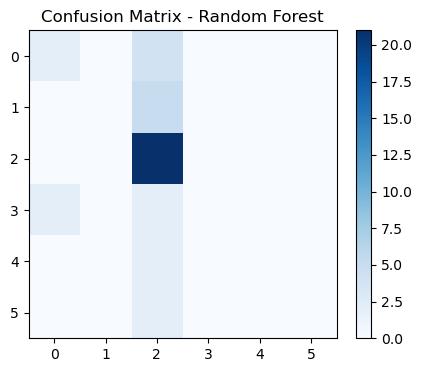

In [31]:
plt.figure(figsize=(5, 4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.colorbar()


Text(0, 0.5, 'Actual')

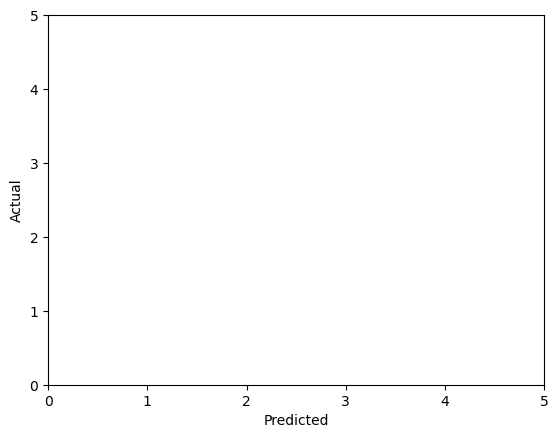

In [32]:
classes = np.unique(y)  
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel("Predicted")
plt.ylabel("Actual")

C:\Users\laksh\AppData\Local\Temp\ipykernel_7092\673885426.py:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


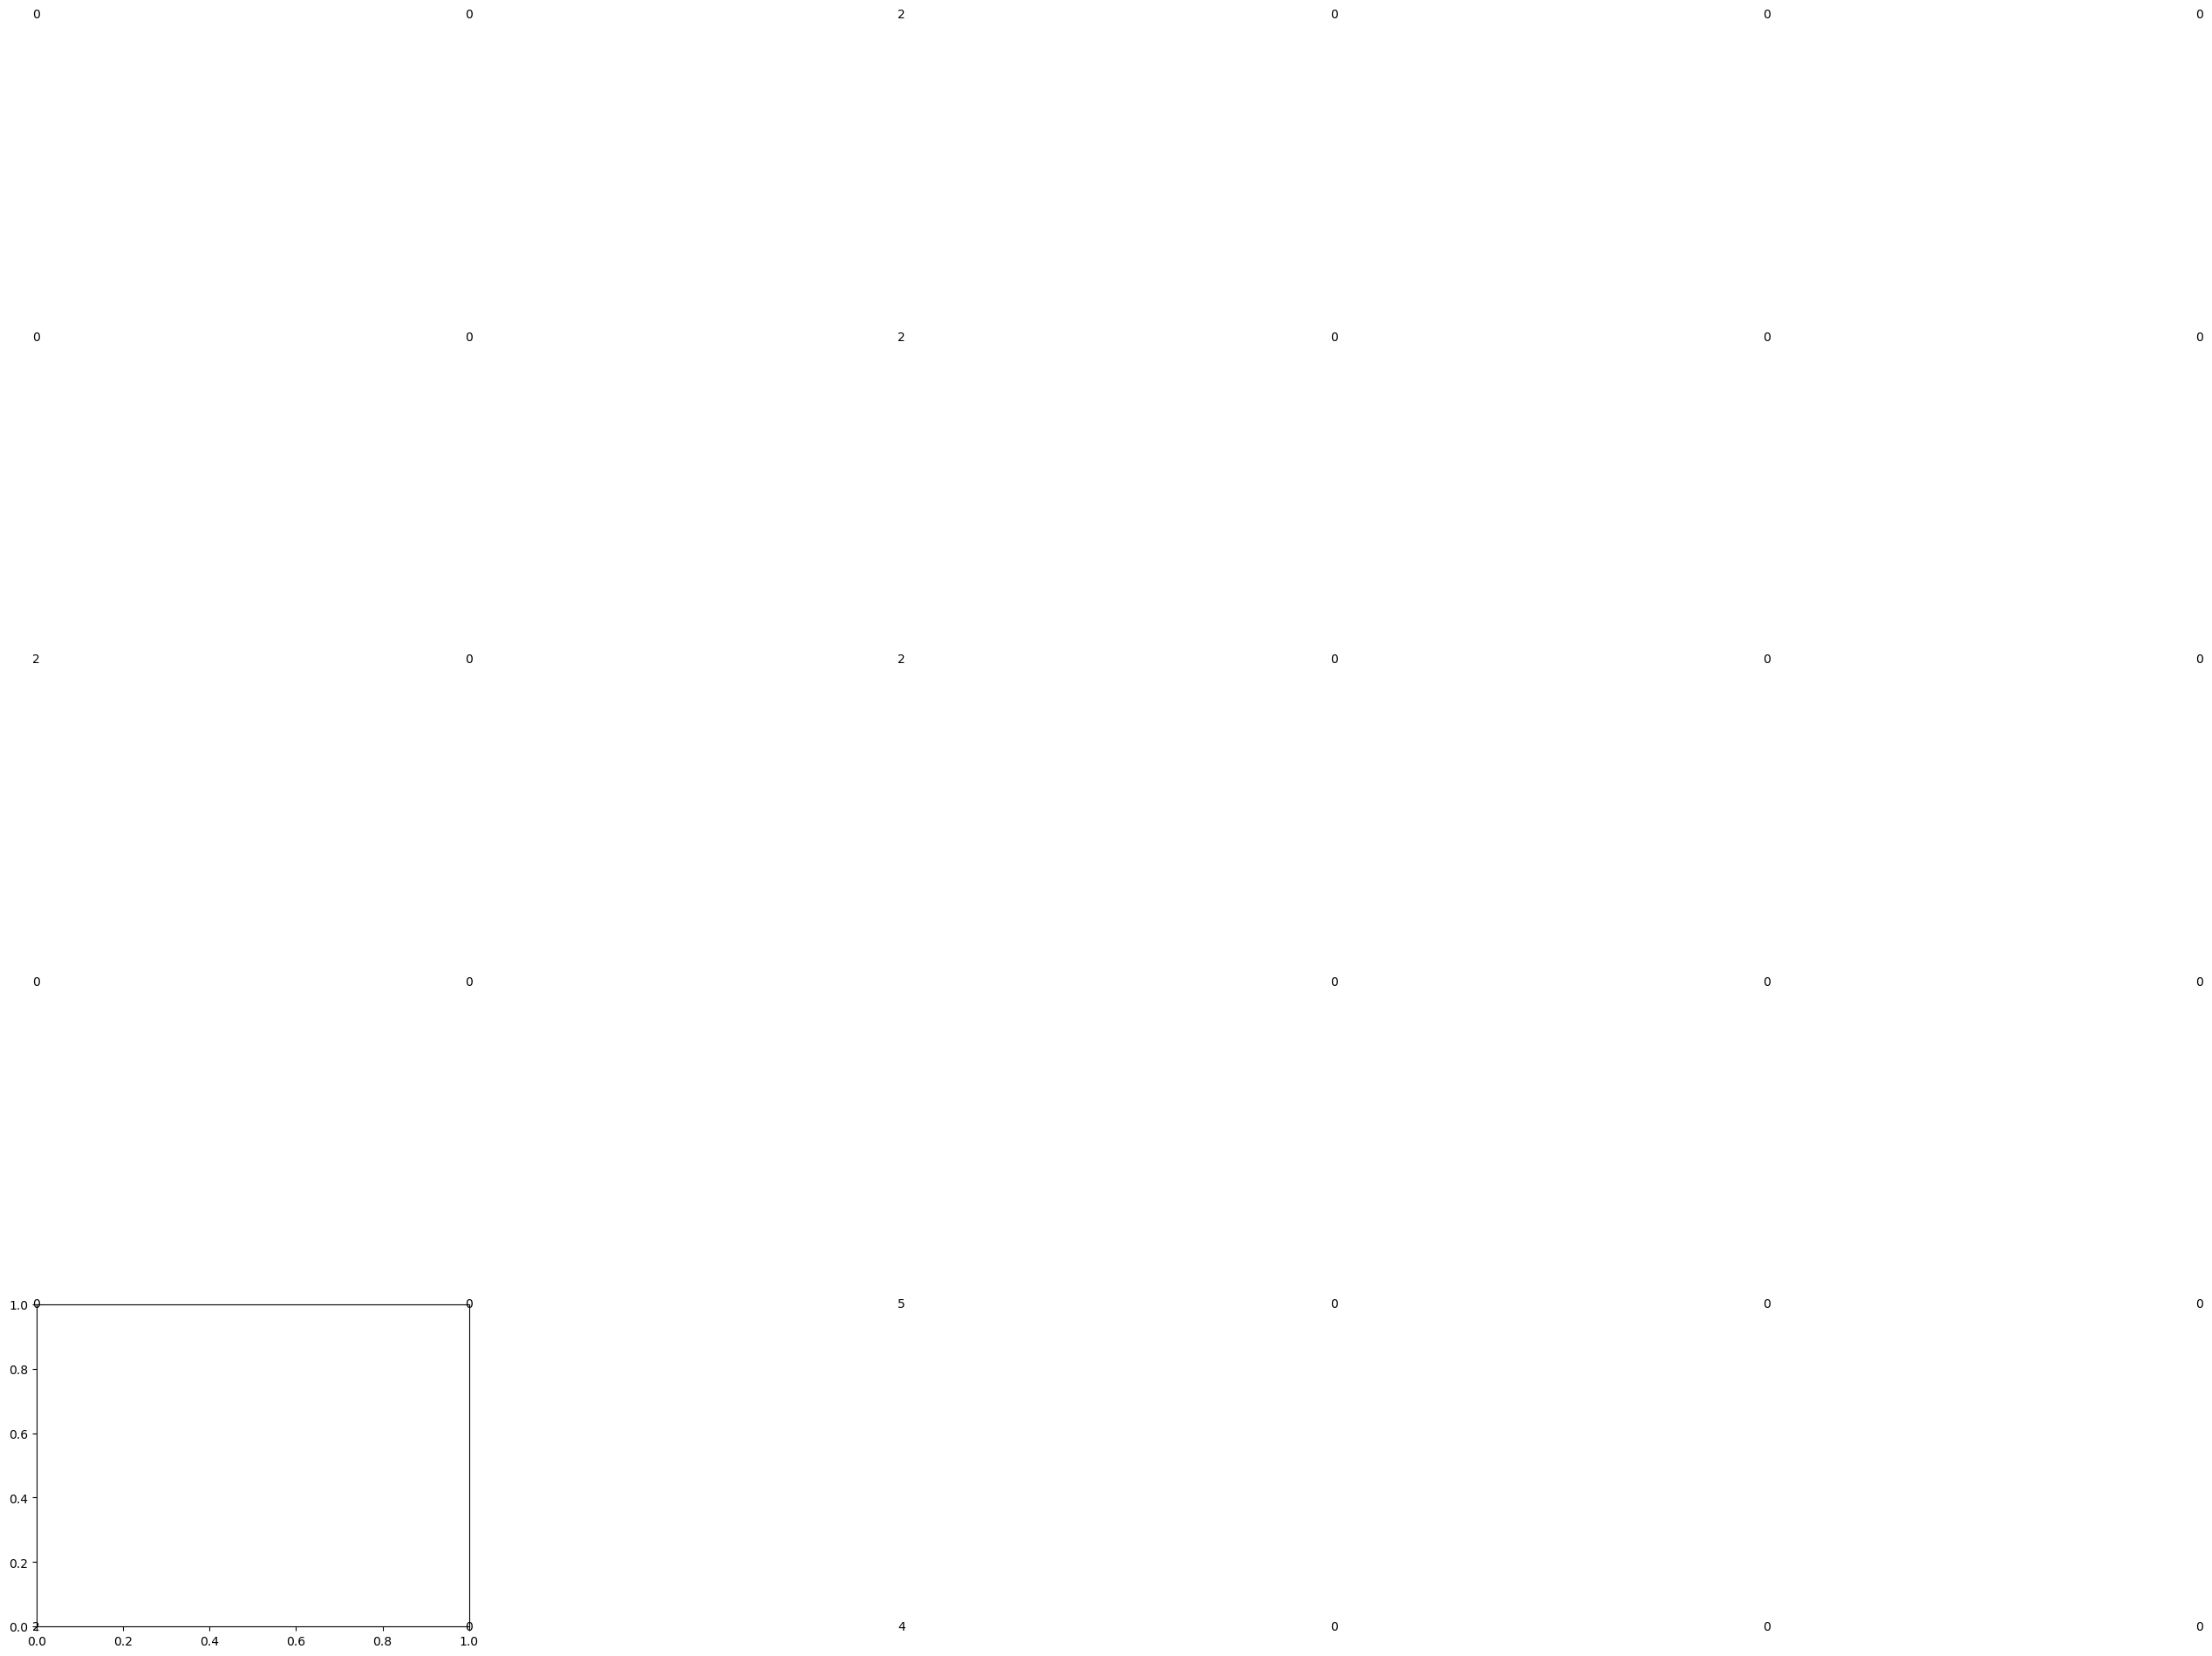

In [33]:
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

In [34]:
import pickle

to_save = {
    "models": models,     
    "results": results    
}

with open("diabetes_full.pkl", "wb") as f:
    pickle.dump(to_save, f)   